In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
dc=pd.read_csv("C:/Users/hp/Downloads/archive (3)/dc.csv")

In [12]:
dc.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [13]:
tata=pd.read_csv("C:/Users/hp/Downloads/archive (4)/Quote-Equity-TATASTEEL-EQ-11-08-2018-to-11-08-2020.csv")

In [14]:
tata.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,11-Aug-2020,EQ,413.10,427.60,412.50,410.20,417.50,416.45,421.21,506.0,250.85,25885192,"10,903,230,075.60",196871
1,10-Aug-2020,EQ,405.75,411.55,399.60,404.05,409.80,410.20,406.00,506.0,250.85,12018305,"4,879,476,229.60",110503
2,07-Aug-2020,EQ,395.90,406.70,393.10,400.45,403.05,404.05,402.46,506.0,250.85,15176343,"6,107,813,365.35",139632
3,06-Aug-2020,EQ,389.75,402.80,385.50,395.80,400.50,400.45,393.82,506.0,250.85,22123358,"8,712,704,876.55",196968
4,05-Aug-2020,EQ,373.05,397.90,373.05,372.25,397.20,395.80,388.36,506.0,250.85,30559760,"11,868,096,905.00",259897


In [15]:
#Statistical Details of the dataset
dc.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


In [16]:
tata.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,No of trades
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,4.900000e+02,490.000000
mean,441.910306,449.084082,434.032449,441.640714,441.179796,441.313673,441.671837,643.230000,376.119694,1.199287e+07,125231.953061
std,96.479009,96.330521,95.775343,96.250558,95.973210,96.062781,96.147939,97.390942,90.043909,6.357782e+06,52646.636280
min,262.250000,267.950000,250.850000,253.750000,254.350000,253.750000,255.680000,506.000000,250.850000,4.138710e+05,7892.000000
25%,356.000000,362.200000,347.775000,356.712500,357.700000,356.712500,355.327500,561.650000,320.350000,7.618883e+06,91290.250000
50%,464.750000,471.650000,456.875000,464.700000,463.275000,464.650000,462.605000,647.600000,345.350000,1.087809e+07,114439.000000
75%,515.600000,521.775000,508.037500,513.737500,513.950000,513.675000,515.882500,720.500000,441.350000,1.452455e+07,147180.250000
max,630.000000,647.600000,617.400000,625.150000,622.000000,625.150000,628.080000,793.000000,493.000000,4.376776e+07,428867.000000


In [19]:
x=dc.iloc[:,:4]
y=dc.iloc[:,4]

In [20]:
x1=tata.iloc[:,:4]
y1=tata.iloc[:,4]

In [22]:
x.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR
0,2021-01-30,128437.248512,34246.28,131012.723200
1,2021-01-29,125144.022272,33368.18,144510.037760
2,2021-01-28,113870.357376,30362.19,126703.438592
3,2021-01-27,121753.023104,32464.01,122102.860416
4,2021-01-26,120966.114176,32254.19,123470.218752


In [46]:
dc.drop(labels='Unnamed: 0', axis=1)

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
...,...,...,...,...,...,...,...,...,...
995,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
996,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
997,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
998,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533


In [48]:
dc.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [23]:
y.head()

0    34933.00
1    38531.90
2    33783.98
3    32557.29
4    32921.88
Name: high_USD, dtype: float64

In [24]:
x1.head()

,Date,series,OPEN,HIGH
0,11-Aug-2020,EQ,413.10,427.60
1,10-Aug-2020,EQ,405.75,411.55
2,07-Aug-2020,EQ,395.90,406.70
3,06-Aug-2020,EQ,389.75,402.80
4,05-Aug-2020,EQ,373.05,397.90


In [25]:
y1.head()

0    412.50
1    399.60
2    393.10
3    385.50
4    373.05
Name: LOW , dtype: float64

In [31]:
from scipy.stats import lognorm

In [32]:
np.random.seed(1)

(array([[1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 800.,  156.,   20.,   24.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 999.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 780.,  174.,   17.,   29.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 996.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 823.,  133.,   29.,   15.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 799.,  156.,   20.,   25.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 999.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 438.,  406.,  110.,   30.,    9.,    4.,    2.,    0.,    0.,
            1.]]),
 array([0.0, 40220.1, 80440.2, 120660.29999999999, 160880.4, 201100.5,
        241320.59999999998, 281540.7,

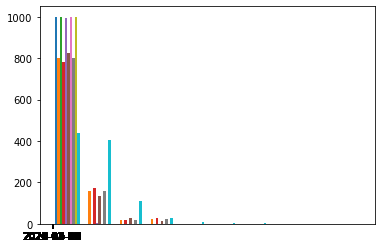

In [33]:
plt.hist(dc)

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [36]:
dc.isnull().sum()

Unnamed: 0    0
open_SAR      0
open_USD      0
high_SAR      0
high_USD      0
low_SAR       0
low_USD       0
close_SAR     0
close_USD     0
volume        0
dtype: int64

In [37]:
dc1 = dc.dropna()

In [38]:
dc1

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
...,...,...,...,...,...,...,...,...,...,...
995,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
996,2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
997,2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
998,2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533


(array([[490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 16., 157., 164.,  81.,  36.,  18.,   9.,   3.,   3.,   3.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.0, 43767

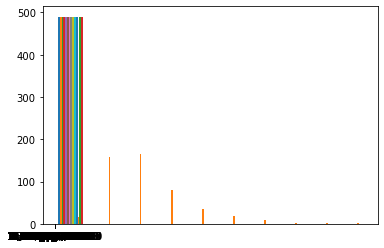

In [39]:
plt.hist(tata)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (800, 4)
X_test: (200, 4)
Y_train: (800,)
Y_test: (200,)
